<h1 style="font-family: Trebuchet MS; padding: 30px; font-size: 30px; color:  #2D2926; text-align: center; line-height: 0.95;background-color: #57C5B6"><b>Caffeine Boost : Improving Product Sales through Segmentation Strategies of Special Attention Customer at Coffee Shops</b></h1>

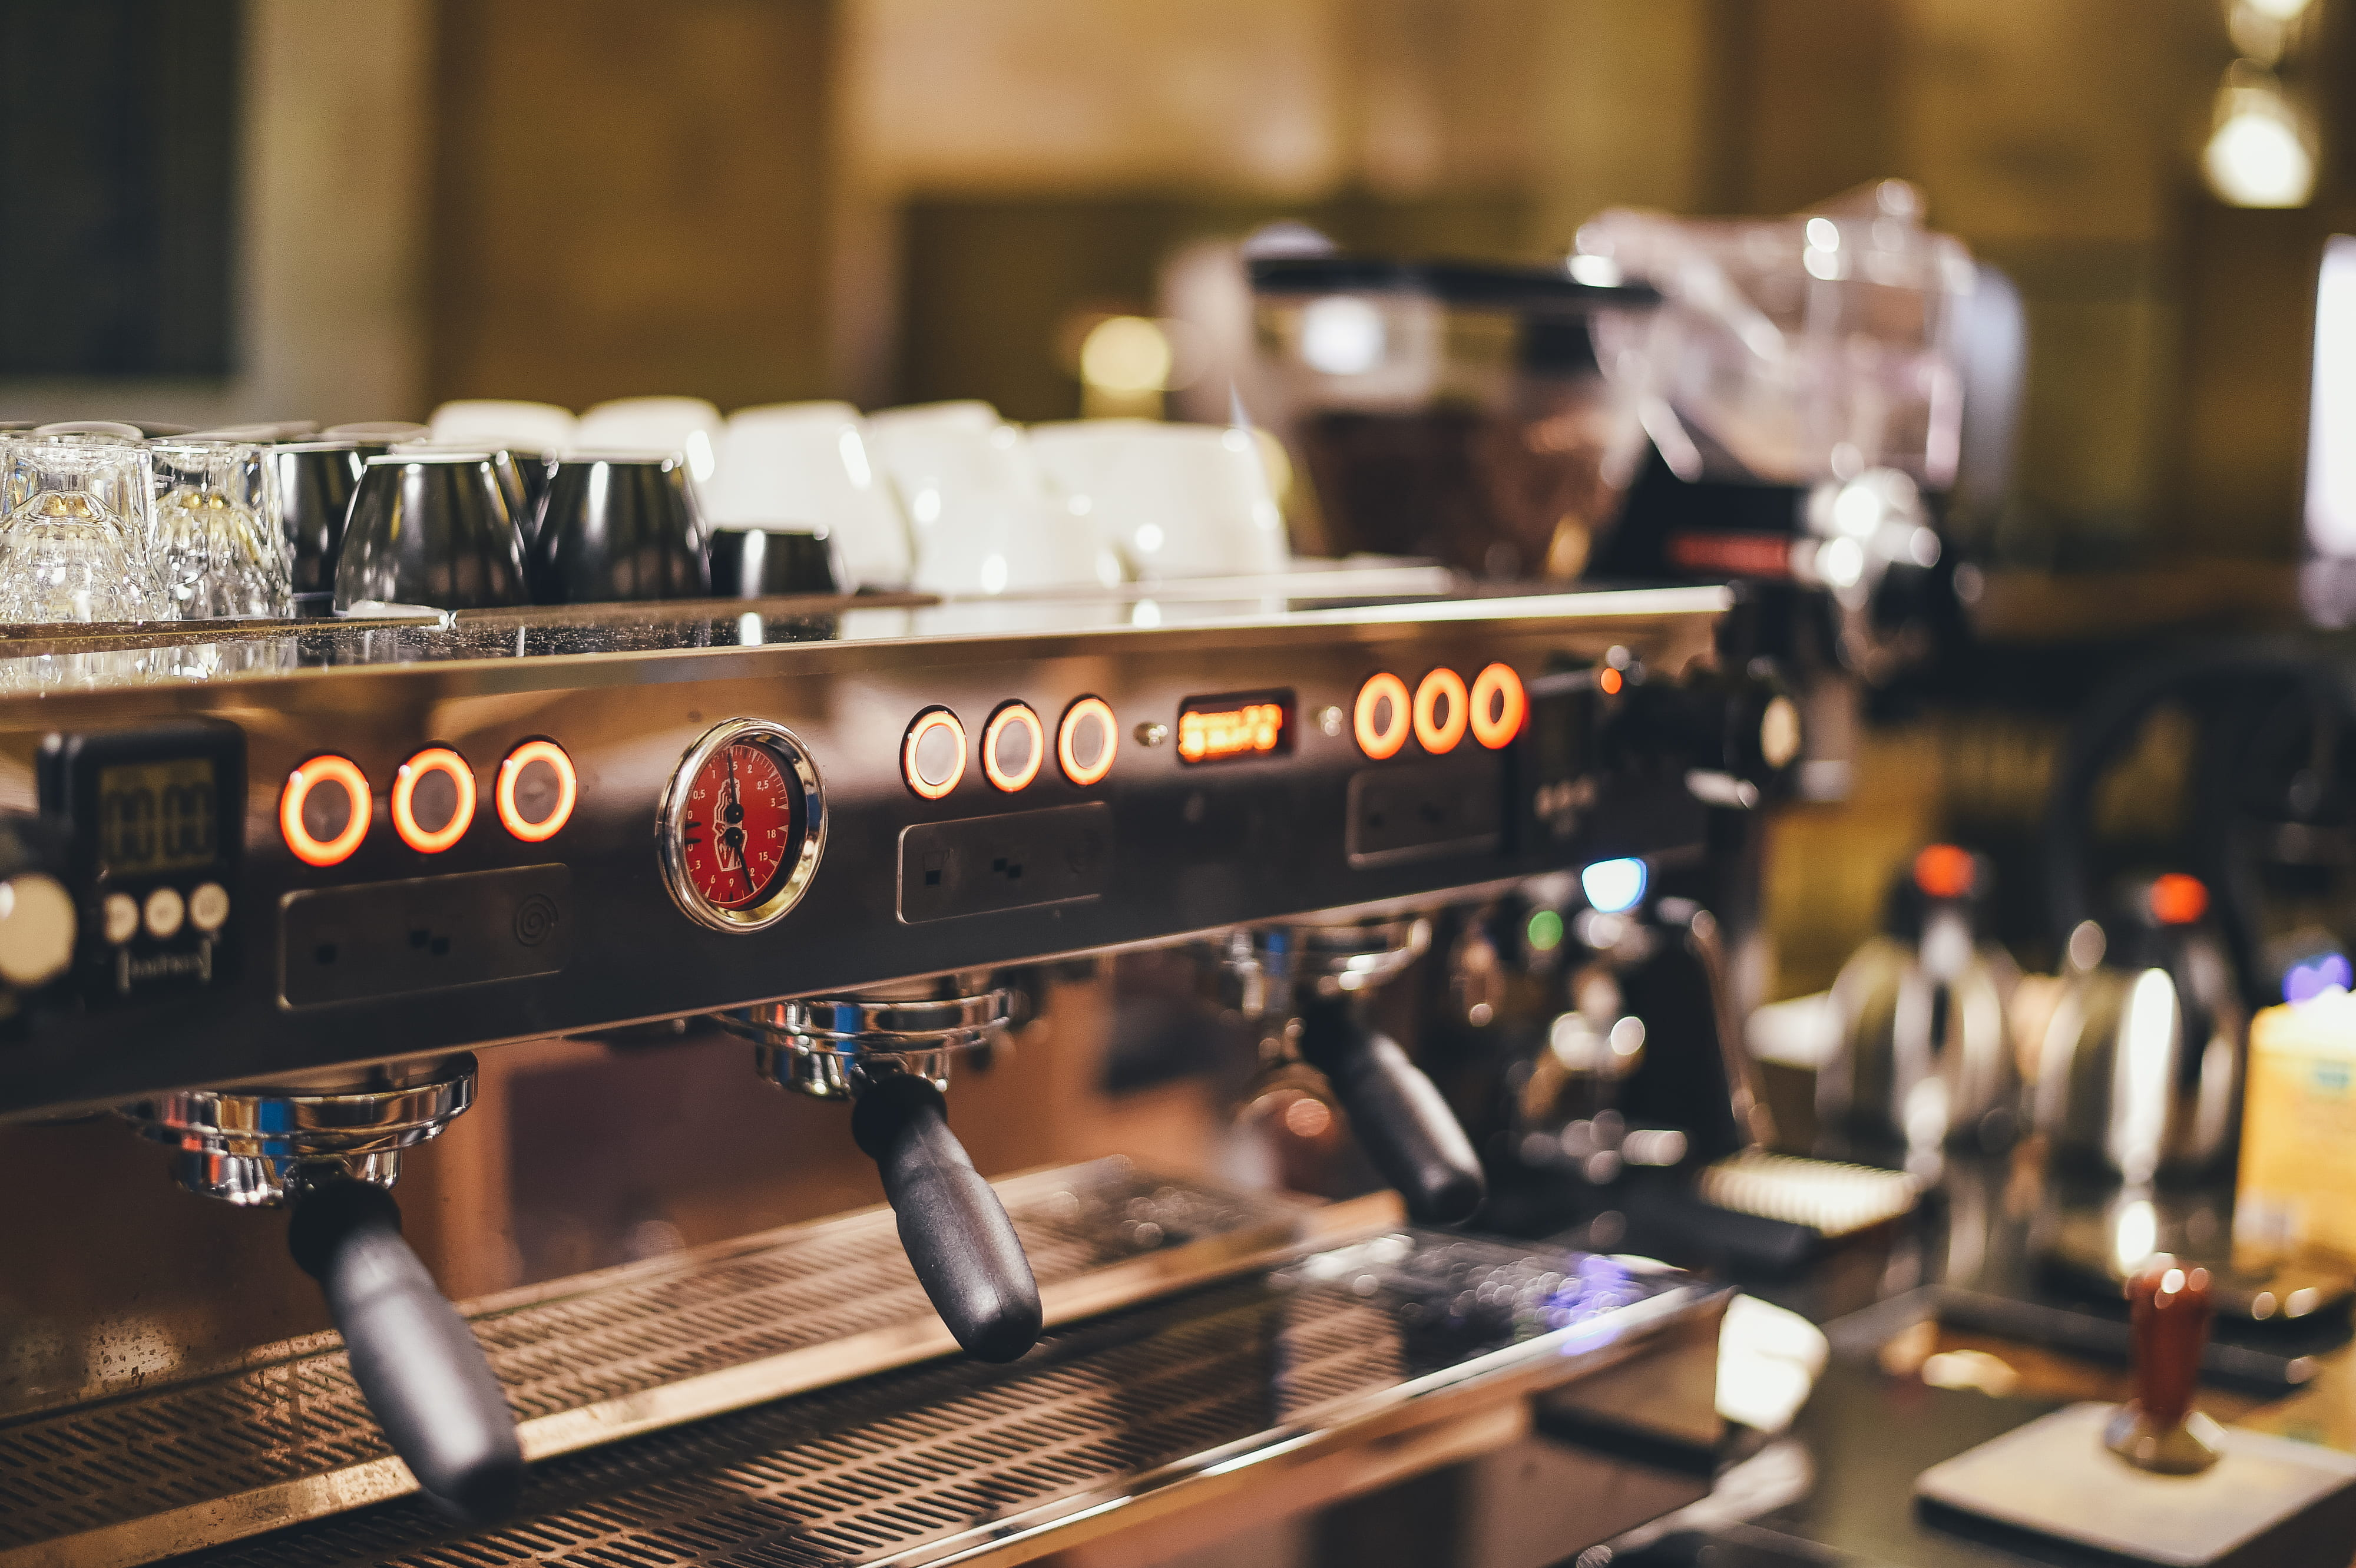

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">About Data</div></center>

The dataset provides a comprehensive look at transaction in a coffee shop of yogyakarta city. This dataset contains ID_transaction, transaction date, transaction year, transaction time, ID_outlet, ID_customer, ID_product, order, amount, total payment, price, promo, types of products, size, tax, gender, Year of birth, City, Age, and Gen. This dataset includes one of coffee shop consumer sales data in Yogyakarta from 2017 to 2019. This data also contained spending behavior in coffee shop transactions, which provided valuable information for the marketing team to create marketing strategies and achieve profits in 2023 after the COVID-19 pandemic. The data source is from questionnaire survey in research.

**Column Descriptions :**

| Column Name | Description |
|-------------|-------------|
| ID_transaksi | nomor transaksi pelanggan | 
| tanggal_transaksi | tanggal transaksi pelanggan | 
| tahun_transaksi | tanggal transaksi pelanggan | 
| waktu_transaksi |  waktu transaksi pelanggan | 
| ID_outlet | nomor outlet |
| ID_cust   | nomor identifikasi pelanggan | 
| ID_produk | nomor produk | 
| order | jumlah per transaksi pelanggan | 
| jumlah | jumlah pembelian pelanggan  | 
| total_pembayaran | total pembayaran pelanggan | 
| harga | harga produk |
| promo | ada/tidaknya promo produk  |
| jenis_produk | jenis produk di outlet | 
| kategori_produk | kategori produk di outlet | 
| tipe_produk | tipe produk di outlet  | 
| ukuran | ukuran produk | 
| pajak | ada/tidaknya pajak | 
| jenis_kelamin | jenis kelamin pelanggan | 
| tahun_lahir | tahun lahir pelanggan | 
| kota | kota pelanggan  |
| umur | umur pelanggan |
| gen | generasi pelanggan |

## Problem Statement

- How the clustering method identified customer groups that require special attention  in order to improve product sales at Coffee Shop ?

## Goals

- Understand behavior of customer groups  in order to give recommendation regarding Customers who require attention for Marketing Team

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">Import Data</div></center>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs

In [2]:
df= pd.read_csv('Coffeshop.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,ID_transaksi,tanggal_transaksi,tahun_transaksi,waktu_transaksi,ID_outlet,ID_cust,ID_produk,order,jumlah,total_pembayaran,harga,promo,jenis_produk,kategori_produk,tipe_produk,ukuran,pajak,jenis_kelamin,tahun_lahir,kota,umur,gen
0,19,2018-12-30,2018,14,3,788,46,1,2,50000.0,25000.0,Tidak,Minuman,Tea,Hot Matcha Latte,Large Size,Ya,Pria,1995,Yogyakarta,23,Gen Z
1,32,2019-03-04,2019,16,3,683,23,1,2,50000.0,25000.0,Tidak,Minuman,Coffee,Americano,Large Size,Ya,Wanita,1999,Yogyakarta,20,Gen Z
2,39,2019-01-24,2019,18,3,664,32,1,1,30000.0,30000.0,Tidak,Minuman,Coffee,Hot Arabica Coffee,Large Size,Ya,Wanita,1996,Yogyakarta,23,Gen Z
3,50,2017-02-04,2017,13,3,316,49,1,2,60000.0,30000.0,Tidak,Minuman,Tea,Hot Black Tea,Large Size,Ya,Wanita,1994,Yogyakarta,23,Gen Z
4,53,2017-04-16,2017,11,3,38,60,1,1,37500.0,37500.0,Tidak,Minuman,Minuman Coklat,Hot chocolate,Medium Size,Ya,Pria,1998,Yogyakarta,19,Gen Z


In [4]:
a=df[df['jenis_produk']=='Makanan']
a['tipe_produk'].unique()

array(['Scone buah', 'Cookies', 'Pastry'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23532 entries, 0 to 23531
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_transaksi       23532 non-null  int64  
 1   tanggal_transaksi  23532 non-null  object 
 2   tahun_transaksi    23532 non-null  int64  
 3   waktu_transaksi    23532 non-null  int64  
 4   ID_outlet          23532 non-null  int64  
 5   ID_cust            23532 non-null  int64  
 6   ID_produk          23532 non-null  int64  
 7   order              23532 non-null  int64  
 8   jumlah             23532 non-null  int64  
 9   total_pembayaran   23532 non-null  float64
 10  harga              23532 non-null  float64
 11  promo              23532 non-null  object 
 12  jenis_produk       23532 non-null  object 
 13  kategori_produk    23532 non-null  object 
 14  tipe_produk        23532 non-null  object 
 15  ukuran             23532 non-null  object 
 16  pajak              235

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">EDA</div></center>

In [6]:
df['waktu_transaksi']= pd.to_datetime(df['waktu_transaksi'])
df['tanggal_transaksi']= pd.to_datetime(df['tanggal_transaksi'])

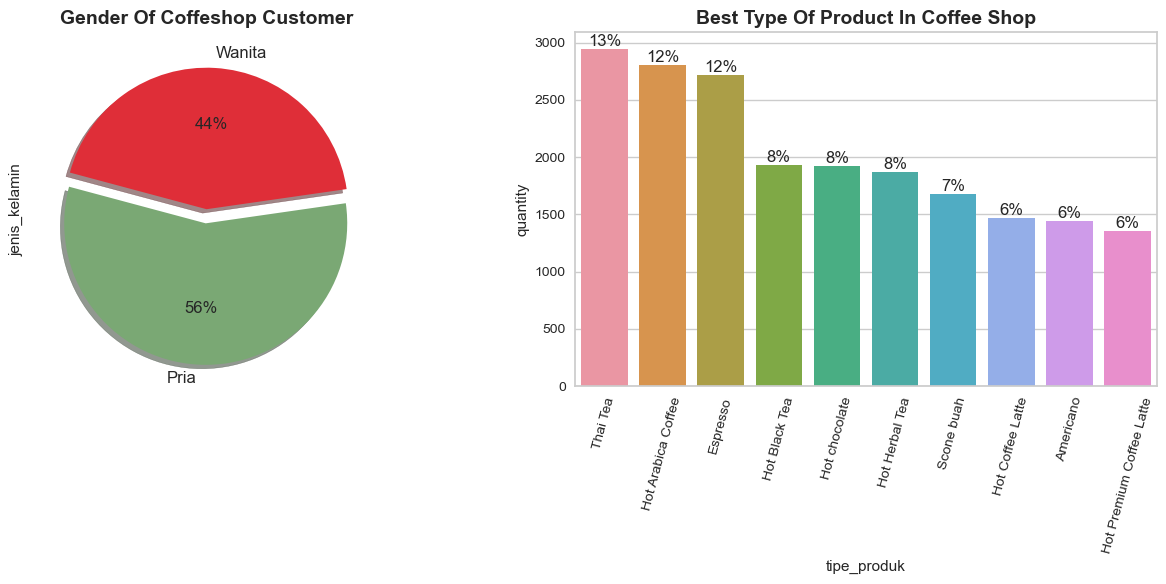

In [7]:
import warnings
warnings.filterwarnings('ignore')

fig, (ax1, ax2)= plt.subplots(1,2, figsize= (13,6))
df['jenis_kelamin'].value_counts().plot.pie(shadow = True, explode=[0.1, 0],autopct='%.0f%%', 
                                                textprops={'fontsize':12}, startangle=165, 
                                                colors=['#7AA874', '#DF2E38'], ax= ax1)

ax1.set_title('Gender Of Coffeshop Customer', fontsize=14, fontweight= 'bold')

total = len(df)
ax = sns.countplot(df['tipe_produk'], ax=ax2, order=df['tipe_produk'].value_counts()[:10].index)

for p in ax.patches:
    percentage = '{:.0f}%'.format((p.get_height()/total)*100)
    ax.annotate(percentage,
               xy = (p.get_x() + p.get_width()/2, p.get_height()),
               ha = 'center', va = 'bottom')
plt.xticks(rotation= 75)
ax2.set_ylabel('quantity')
ax2.set_title('Best Type Of Product In Coffee Shop', fontsize=14, fontweight= 'bold')
plt.tight_layout()

### Insight

1. The majority of customers who transact at the Coffee Shop are **male**, around to 56%, compared to females just 44%.

2. The best-selling product types at the Coffee Shop are **Thai Tea** and other types of coffee that match the target.

### Porportion in repeating and single Order

In [8]:
id= pd.DataFrame(df['ID_cust'].value_counts()).reset_index()
status=[]
for i in range(len(id)):
    if id['ID_cust'][i]==1:
        status.append('single')
    else:
        status.append('repeating')
    
id['status']= status
id

,index,ID_cust,status
0,8285,30,repeating
1,8341,28,repeating
2,8118,28,repeating
3,8446,27,repeating
4,8384,27,repeating
...,...,...,...
2240,5589,1,single
2241,5147,1,single
2242,427,1,single
2243,5076,1,single


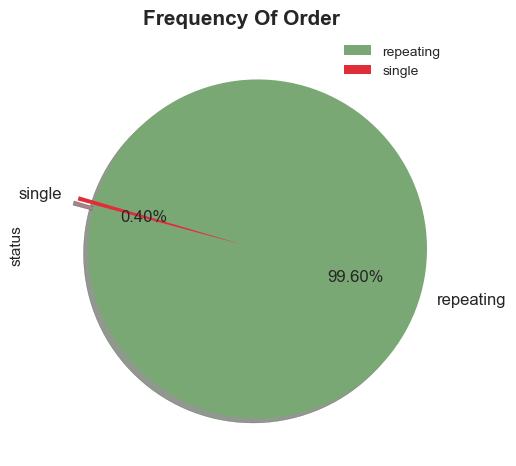

In [9]:
id['status'].value_counts().plot.pie(shadow = True, explode=[0.1, 0],autopct='%.2f%%', 
                                                textprops={'fontsize':12}, startangle=165, 
                                                colors=['#7AA874', '#DF2E38'])
plt.title('Frequency Of Order', fontsize=15, fontweight= 'bold')
plt.legend()

Text(0.5, 0, 'quantity')

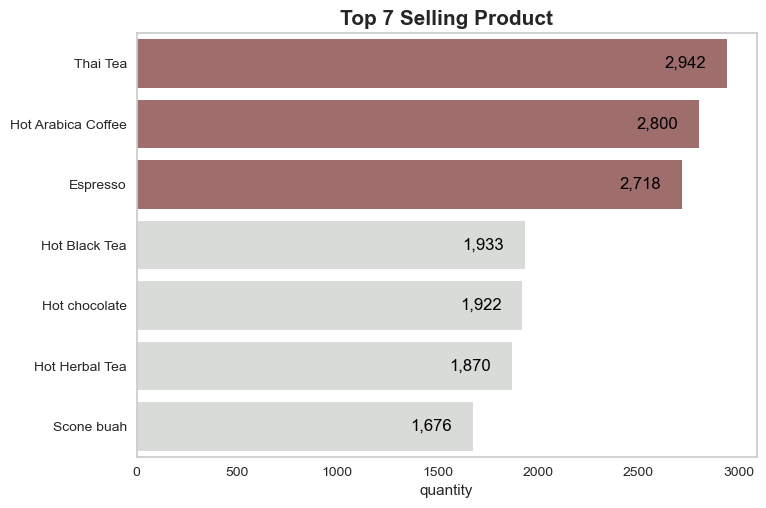

In [10]:
s=df['tipe_produk'].value_counts()
warna = ['#A86464','#A86464','#A86464','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6']
ax = sns.barplot(y=s.index[:7],x= s.values[:7], orient= 'h', palette=warna)
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = -45
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points', 
        va='center',                
        ha=ha,                      
        color = 'black')            

            
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(text=None, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

plt.title('Top 7 Selling Product', fontsize=15, fontweight= 'bold')
plt.grid(False)
ax.set_xlabel('quantity')
#plt.savefig('demo.png', transparent=True)

### Insight

The top 7 selling products, the best selling types of products in the Coffee Shop are **Thai Tea, Hot Arabica Coffee, and Espresso**.

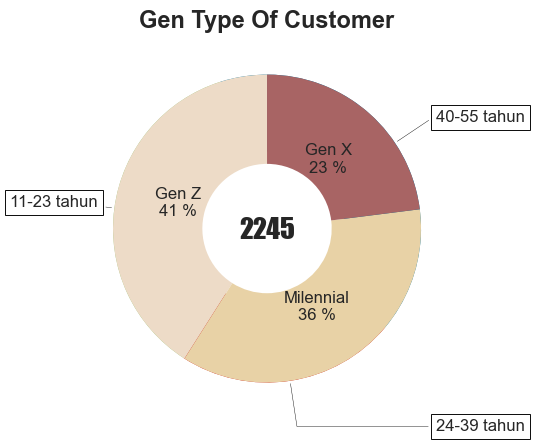

In [11]:
fig, ax = plt.subplots(figsize=(9, 5), subplot_kw=dict(aspect="equal"))

recipe = ["40-55 tahun","11-23 tahun","24-39 tahun"]
lbls = ['Gen Z', 'Milennial', 'Gen X']

data = [41, 36, 23]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
class MyClass:
    i = -1
def func(pct, labels, vals):
    MyClass.i +=1
    return "{:s}\n{:.0f} %".format(labels[MyClass.i], pct)


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.3*y),
                horizontalalignment=horizontalalignment, **kw)
    
ax.pie(data, wedgeprops=dict(width=0.58), autopct=lambda pct: func(pct, lbls, data), 
       startangle=90 , colors= ['#EDDBC7','#E8D2A6','#A86464'])

sumstr = str(len(df['ID_cust'].unique()))
ax.text(0., 0., sumstr, horizontalalignment='center', verticalalignment='center', fontsize= 20, 
        fontfamily= 'fantasy', fontweight= 'book')
ax.set_title("Gen Type Of Customer", fontsize= 17, fontweight= 'bold')

plt.show()

### Insight

Based on the customer generation types, it was found that:

- Gen Z is the generation that has the highest number of transactions compared to other generations, which is 41% with an age range of 11-23 years.

In [12]:
x= df[df['tanggal_transaksi']<= '2019-04-01']

In [13]:
trend_sales = x.copy()
trend_sales = trend_sales.set_index('tanggal_transaksi')
trend_sales = pd.DataFrame(trend_sales.resample('20D')['jumlah'].count())
trend_sales = trend_sales.rename(columns={'jumlah' : 'Product Sold'}).reset_index()
trend_sales.head(10)

,tanggal_transaksi,Product Sold
0,2017-01-03,712
1,2017-01-23,498
2,2017-02-12,544
3,2017-03-04,521
4,2017-03-24,517
5,2017-04-13,458
6,2017-05-03,585
7,2017-05-23,638
8,2017-06-12,533
9,2017-07-02,549


Text(0.5, 1.0, 'Trend Of Sales By Product Sold')

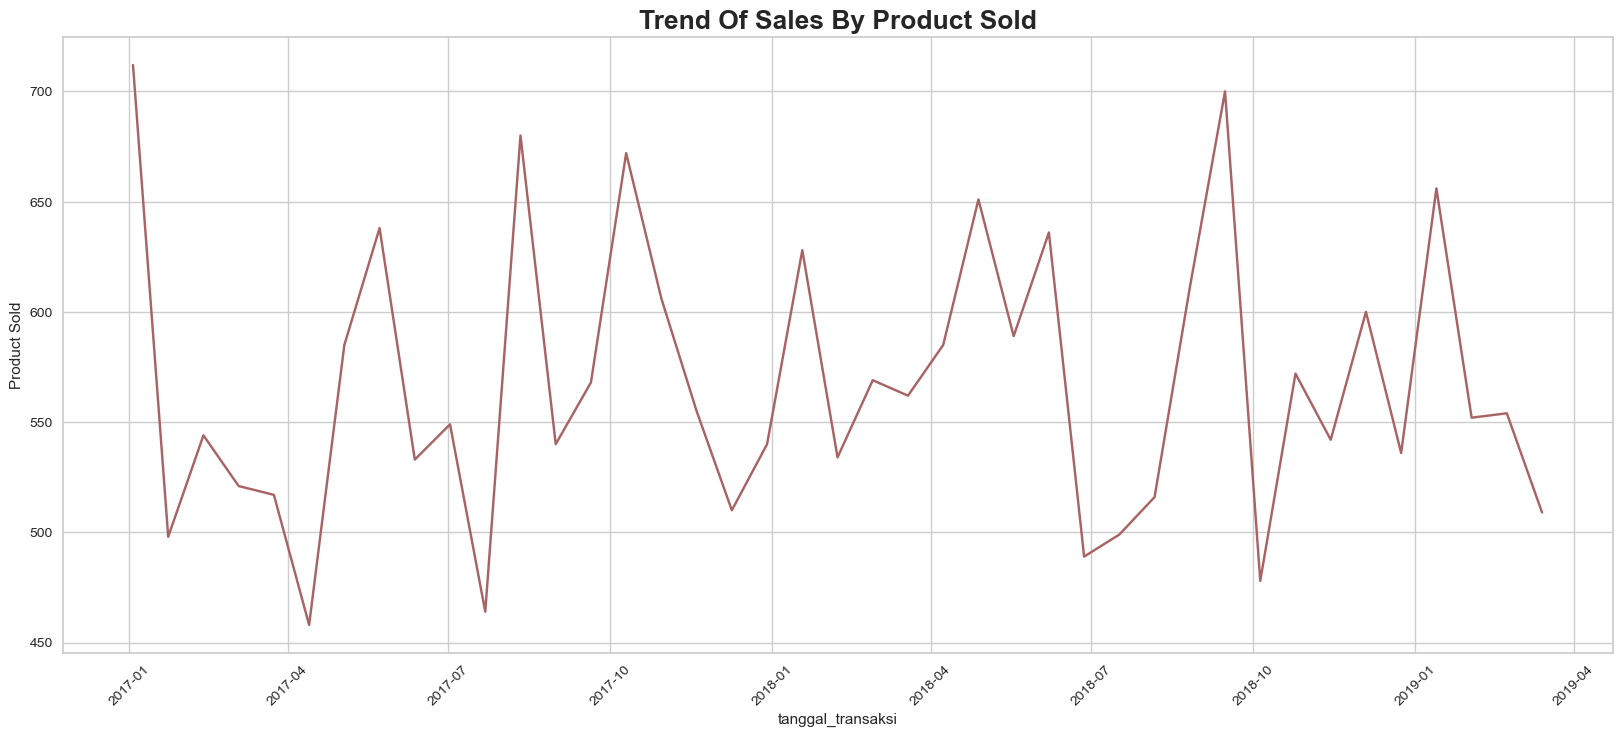

In [14]:
plt.figure(figsize=(20,8))
sns.lineplot(x= trend_sales['tanggal_transaksi'], y= trend_sales['Product Sold'], color= '#A86464')
plt.xticks(rotation= 45)
plt.title('Trend Of Sales By Product Sold', fontsize=19, fontweight= 'bold')
#plt.savefig('demo.png', transparent=True);

### Insight

Based on product sales trend, it shows **UP and DOWN /unstable trend** from 2017 - 2019

In [15]:
x= df[df['tanggal_transaksi']< '2019-04-01']
product_daily = x.groupby([pd.Grouper(key= 'tanggal_transaksi', freq='M'), 
                                  'kategori_produk'])[['kategori_produk']].count().rename(columns={'kategori_produk': 'Sold'}).reset_index()
product_daily.sort_values(by='Sold', ascending=False)

,tanggal_transaksi,kategori_produk,Sold
65,2017-10-31,Coffee,458
3,2017-01-31,Coffee,415
38,2017-06-30,Coffee,404
52,2017-08-31,Coffee,402
113,2018-05-31,Coffee,396
...,...,...,...
93,2018-02-28,Leaf Tea,2
71,2017-11-30,Chocolate Boxes,1
16,2017-03-31,Chocolate Boxes,1
44,2017-07-31,Chocolate Boxes,1


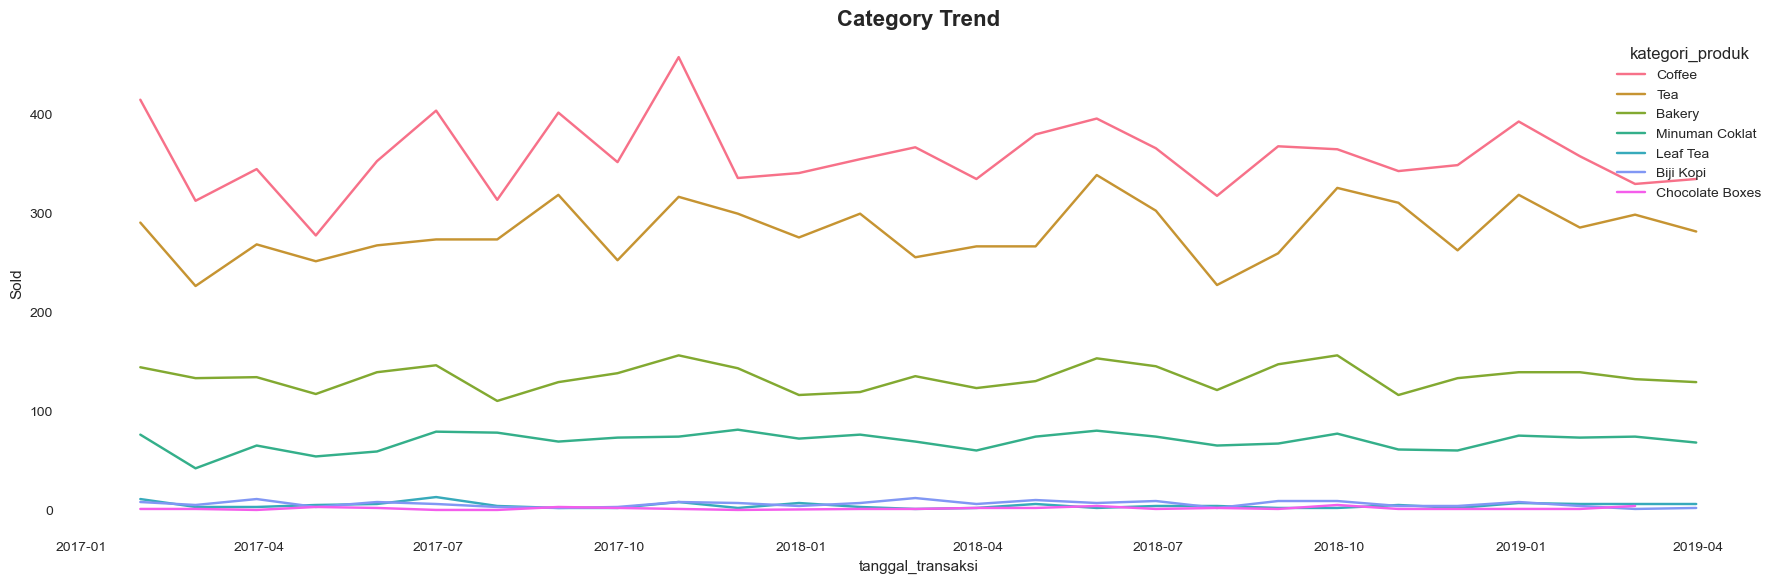

In [16]:
plt.figure(figsize=(18, 6))
sns.lineplot(data= product_daily.sort_values(by='Sold', ascending=False), 
             x= 'tanggal_transaksi', y= 'Sold', hue= 'kategori_produk')
plt.title('Category Trend', fontsize=16, fontweight= 'bold')
plt.tight_layout()
plt.grid(False)
sns.despine(bottom = True, left = True)
#plt.savefig('demo.png', transparent=True);
plt.show()

## Insight

- Each product does not show an upward trend and tends to be stagnant.

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">Preprocessing</div></center>

In [17]:
df['waktu_transaksi']= df['waktu_transaksi'].astype('int64')

In [18]:
df2=df.drop(['ID_transaksi','tanggal_transaksi','ID_outlet','ID_cust','ID_produk','tahun_transaksi','tahun_lahir','kota'], axis=1)

In [19]:
df2.promo=df2.promo.replace({'Ya':0,'Tidak':1})
df2.pajak=df2.pajak.replace({'Ya':0,'Tidak':1})
df2.jenis_kelamin=df2.jenis_kelamin.replace({'Pria':0,'Wanita':1})
df2.jenis_produk = df2.jenis_produk.replace({'Minuman':0,'Makanan':1,'Biji Kopi/Teh':2})
df2.kategori_produk = df2.kategori_produk.replace({'Tea':0,'Coffee':1,'Minuman Coklat':2,'Bakery':3,'Biji Kopi':4,'Leaf Tea':5,'Chocolate Boxes':6})
df2.ukuran = df2.ukuran.replace({'Large Size':0,'Medium Size':1,'Small Size':2,'Single':3,'500 gram':4,'2.5 kg':5})
df2.gen = df2.gen.replace({'Milennial':0,'Gen Z':1,'Gen X':2})

In [20]:
le = LabelEncoder()
df2['tipe_produk'] = le.fit_transform(df2['tipe_produk'])

In [21]:
df2

,waktu_transaksi,order,jumlah,total_pembayaran,harga,promo,jenis_produk,kategori_produk,tipe_produk,ukuran,pajak,jenis_kelamin,umur,gen
0,14,1,2,50000.0,25000.0,1,0,0,12,0,0,0,23,1
1,16,1,2,50000.0,25000.0,1,0,1,0,0,0,1,20,1
2,18,1,1,30000.0,30000.0,1,0,1,8,0,0,1,23,1
3,13,1,2,60000.0,30000.0,1,0,0,9,0,0,1,23,1
4,11,1,1,37500.0,37500.0,1,0,2,14,1,0,0,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23527,17,1,1,31000.0,31000.0,1,0,0,22,0,0,1,44,0
23528,18,1,2,50000.0,25000.0,1,0,0,9,0,0,1,40,0
23529,17,1,2,85000.0,42500.0,1,0,1,5,2,0,0,49,0
23530,10,1,2,85000.0,42500.0,1,0,1,5,2,0,1,40,0


# Scaling

In [22]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df2)

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">MODEL</div></center>

# PCA

In [23]:
pca = PCA(n_components=7)
pca.fit(df_scaled)
pca_scores = pca.transform(df_scaled)

pca.explained_variance_ratio_

array([0.2805721 , 0.15252771, 0.10250423, 0.07609562, 0.07302941,
       0.07121726, 0.06826472])

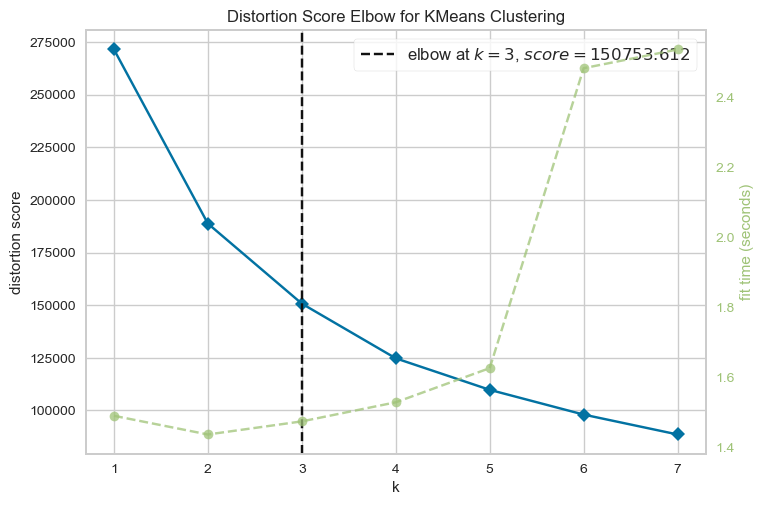

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))

visualizer.fit(pca_scores)       
visualizer.show()       

### Insight

**K Optimal is 3**

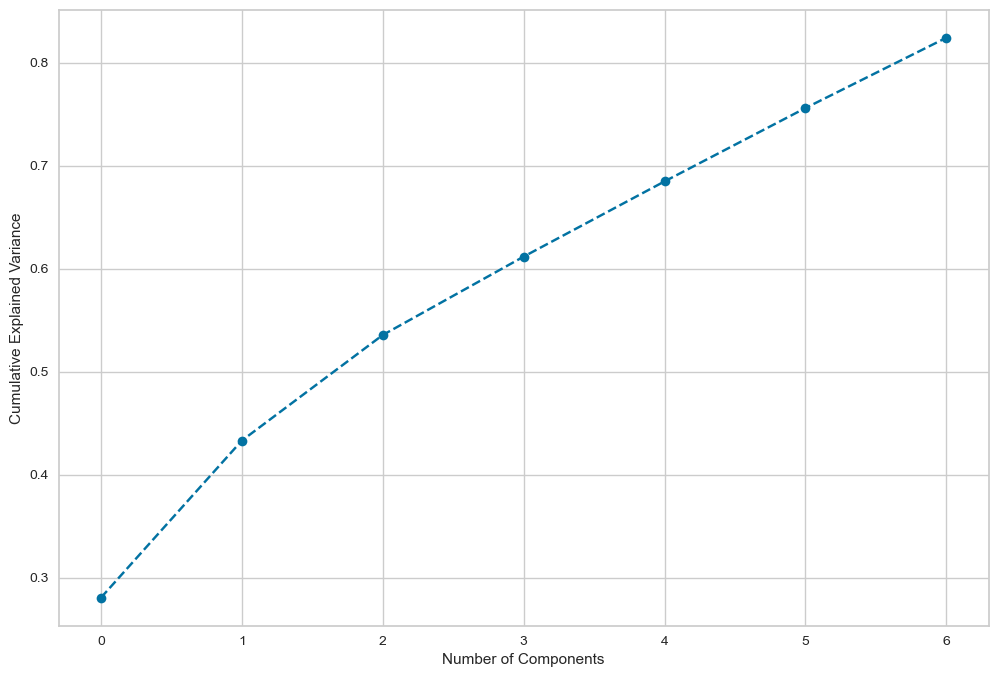

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

### Insight

The number of components that can represent all variables is **7**

In [26]:
df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=df2.columns.values,index=['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7'])

df_pca_components

,waktu_transaksi,order,jumlah,total_pembayaran,harga,promo,jenis_produk,kategori_produk,tipe_produk,ukuran,pajak,jenis_kelamin,umur,gen
component 1,-0.0330,0.2652,-0.1987,0.1064,0.2925,-0.0435,0.4858,0.4573,0.1119,0.4250,0.3899,-0.0054,-0.0052,0.0041
component 2,-0.0338,0.4249,0.3138,0.5734,0.4754,0.0854,-0.0312,-0.0460,-0.1068,-0.1523,-0.3457,0.0086,0.0123,-0.0161
component 3,0.0921,-0.0228,0.0101,0.0053,-0.0125,0.0330,0.0038,0.0128,0.0159,0.0132,0.0216,0.2962,0.6625,-0.6796
component 4,-0.2306,-0.2603,0.5600,0.2686,-0.1470,-0.5985,0.0050,0.0222,0.2067,0.1261,0.1835,-0.1288,0.0589,-0.0236
component 5,0.0270,-0.0780,0.0647,0.1046,0.0394,0.4107,0.0490,-0.1266,0.8617,-0.1816,0.1134,-0.0101,-0.0154,0.0260
component 6,0.8880,-0.1327,0.2230,0.1439,-0.0356,-0.0394,0.0092,0.0552,-0.0394,0.0997,0.0892,0.2566,-0.1498,0.0987
component 7,-0.3168,0.0008,0.0102,-0.0033,-0.0114,-0.0768,-0.0004,-0.0134,0.0449,-0.0110,0.0024,0.9069,-0.2305,0.1249


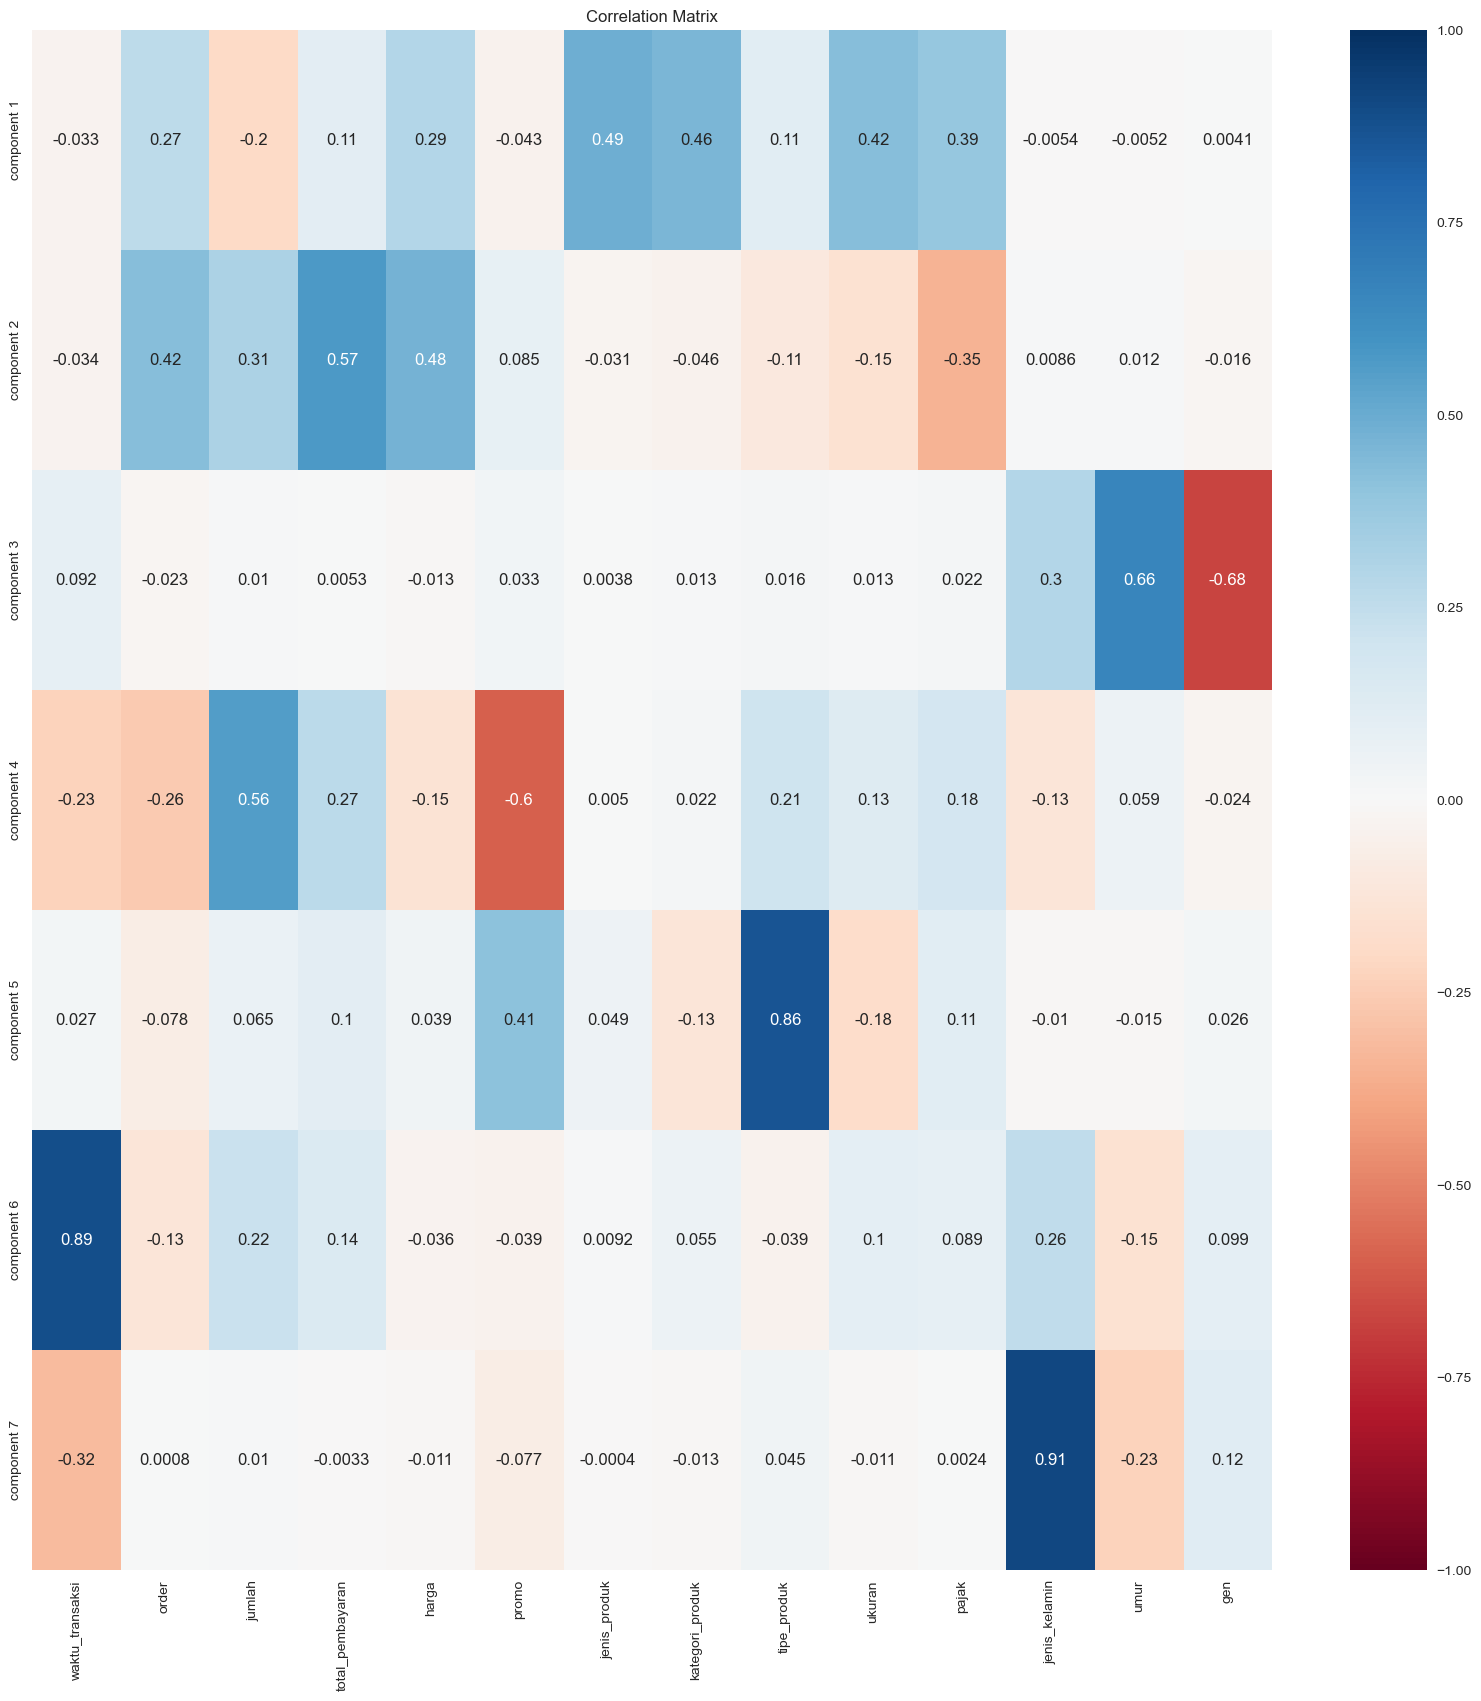

In [27]:
plt.figure(figsize=(20, 20))
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

### Insight

Component 1:
>- In component 1, variables that have high correlation with component 1 are product type, product category, and size.This component represents the product.

Component 2:
>- In component 2, variables that have high correlation with component 2 are order, quantity, total payment, and price. This component represents the transaction.

In [28]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=3, random_state=42)

In [29]:
df_segm_pca = pd.concat([df2.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-7:] = ['component 1', 'component 2', 'component 3','component 4','component 5','component 6','component 7']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_
df_segm_pca.head()

,waktu_transaksi,order,jumlah,total_pembayaran,harga,promo,jenis_produk,kategori_produk,tipe_produk,ukuran,pajak,jenis_kelamin,umur,gen,component 1,component 2,component 3,component 4,component 5,component 6,component 7,K-means PCA
0,14,1,2,50000.0,25000.0,1,0,0,12,0,0,0,23,1,-1.525932,0.444165,-0.436419,0.466314,0.376073,0.335832,-0.804957,2
1,16,1,2,50000.0,25000.0,1,0,1,0,0,0,1,20,1,-1.354290,0.597700,0.010452,-0.297014,-1.339315,1.490970,0.822564,2
2,18,1,1,30000.0,30000.0,1,0,1,8,0,0,1,23,1,-0.848124,-0.361029,0.235651,-1.401997,-0.435519,1.360239,0.625612,2
3,13,1,2,60000.0,30000.0,1,0,0,9,0,0,1,23,1,-1.478376,0.800991,0.127527,0.214039,-0.012088,0.667502,1.084033,2
4,11,1,1,37500.0,37500.0,1,0,2,14,1,0,0,19,1,0.227184,-0.292109,-0.741991,-0.409260,0.110811,-0.647091,-0.511517,2


In [30]:
df_segm_pca['Cluster'] = df_segm_pca['K-means PCA'].map({
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3'
})
df_segm_pca.head()

,waktu_transaksi,order,jumlah,total_pembayaran,harga,promo,jenis_produk,kategori_produk,tipe_produk,ukuran,pajak,jenis_kelamin,umur,gen,component 1,component 2,component 3,component 4,component 5,component 6,component 7,K-means PCA,Cluster
0,14,1,2,50000.0,25000.0,1,0,0,12,0,0,0,23,1,-1.525932,0.444165,-0.436419,0.466314,0.376073,0.335832,-0.804957,2,Cluster 3
1,16,1,2,50000.0,25000.0,1,0,1,0,0,0,1,20,1,-1.354290,0.597700,0.010452,-0.297014,-1.339315,1.490970,0.822564,2,Cluster 3
2,18,1,1,30000.0,30000.0,1,0,1,8,0,0,1,23,1,-0.848124,-0.361029,0.235651,-1.401997,-0.435519,1.360239,0.625612,2,Cluster 3
3,13,1,2,60000.0,30000.0,1,0,0,9,0,0,1,23,1,-1.478376,0.800991,0.127527,0.214039,-0.012088,0.667502,1.084033,2,Cluster 3
4,11,1,1,37500.0,37500.0,1,0,2,14,1,0,0,19,1,0.227184,-0.292109,-0.741991,-0.409260,0.110811,-0.647091,-0.511517,2,Cluster 3


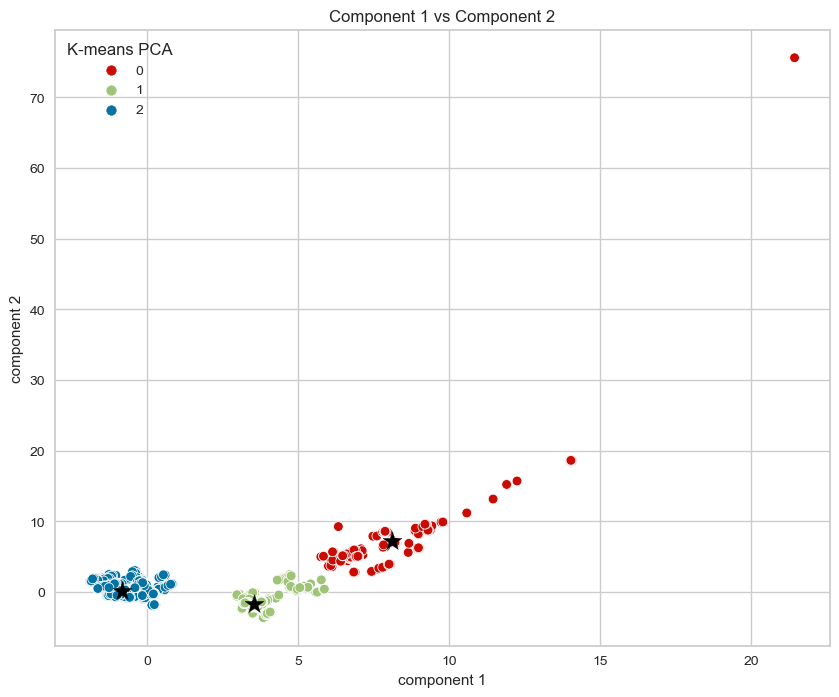

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 1'],
    y=df_segm_pca['component 2'],
    hue=df_segm_pca['K-means PCA'],
    palette=['r','g','b'])

centers=np.array(kmeans_pca.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],color='black',marker='*',s=200)

plt.title('Component 1 vs Component 2')
plt.show()

### Insight

K-Means Method can cluster data properly

In [32]:
data_cluster=df_segm_pca.copy()
data_cluster.head(3)

,waktu_transaksi,order,jumlah,total_pembayaran,harga,promo,jenis_produk,kategori_produk,tipe_produk,ukuran,pajak,jenis_kelamin,umur,gen,component 1,component 2,component 3,component 4,component 5,component 6,component 7,K-means PCA,Cluster
0,14,1,2,50000.0,25000.0,1,0,0,12,0,0,0,23,1,-1.525932,0.444165,-0.436419,0.466314,0.376073,0.335832,-0.804957,2,Cluster 3
1,16,1,2,50000.0,25000.0,1,0,1,0,0,0,1,20,1,-1.354290,0.597700,0.010452,-0.297014,-1.339315,1.490970,0.822564,2,Cluster 3
2,18,1,1,30000.0,30000.0,1,0,1,8,0,0,1,23,1,-0.848124,-0.361029,0.235651,-1.401997,-0.435519,1.360239,0.625612,2,Cluster 3


In [33]:
data_cluster.drop(['component 1', 'component 2', 'component 3','component 4','component 5','component 6','component 7','K-means PCA'],axis=1,inplace=True)

In [34]:
def highlight_max_min(s):
   
    is_max = s == s.max()
    is_min = s == s.min()
    return ['background-color: #9DF1DF' if v else 'background-color: #C780FA' if is_min[i] else '' for i,v in enumerate(is_max)]


profil = data_cluster.groupby('Cluster').mean().round(2).T
profil_styled = profil.style.apply(highlight_max_min, axis=1)

profil_styled

Cluster,Cluster 1,Cluster 2,Cluster 3
waktu_transaksi,10.860000,12.120000,12.410000
order,6.580000,1.040000,1.000000
jumlah,1.020000,1.020000,1.520000
total_pembayaran,163548.180000,35836.210000,46328.930000
harga,154876.300000,35732.390000,30508.780000
promo,1.000000,0.980000,1.000000
jenis_produk,2.000000,1.010000,0.000000
kategori_produk,4.650000,3.010000,0.700000
tipe_produk,11.190000,16.100000,10.790000
ukuran,2.680000,2.990000,0.450000


# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">EDA AFTER MODELLING</div></center>

In [35]:
data_cluster= df.copy()

In [36]:
data_cluster['Cluster'] = df_segm_pca['K-means PCA'].map({
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3'
})
data_cluster.head()

,ID_transaksi,tanggal_transaksi,tahun_transaksi,waktu_transaksi,ID_outlet,ID_cust,ID_produk,order,jumlah,total_pembayaran,harga,promo,jenis_produk,kategori_produk,tipe_produk,ukuran,pajak,jenis_kelamin,tahun_lahir,kota,umur,gen,Cluster
0,19,2018-12-30,2018,14,3,788,46,1,2,50000.0,25000.0,Tidak,Minuman,Tea,Hot Matcha Latte,Large Size,Ya,Pria,1995,Yogyakarta,23,Gen Z,Cluster 3
1,32,2019-03-04,2019,16,3,683,23,1,2,50000.0,25000.0,Tidak,Minuman,Coffee,Americano,Large Size,Ya,Wanita,1999,Yogyakarta,20,Gen Z,Cluster 3
2,39,2019-01-24,2019,18,3,664,32,1,1,30000.0,30000.0,Tidak,Minuman,Coffee,Hot Arabica Coffee,Large Size,Ya,Wanita,1996,Yogyakarta,23,Gen Z,Cluster 3
3,50,2017-02-04,2017,13,3,316,49,1,2,60000.0,30000.0,Tidak,Minuman,Tea,Hot Black Tea,Large Size,Ya,Wanita,1994,Yogyakarta,23,Gen Z,Cluster 3
4,53,2017-04-16,2017,11,3,38,60,1,1,37500.0,37500.0,Tidak,Minuman,Minuman Coklat,Hot chocolate,Medium Size,Ya,Pria,1998,Yogyakarta,19,Gen Z,Cluster 3


In [37]:
cluster1= data_cluster[data_cluster['Cluster']== 'Cluster 1']
a= pd.DataFrame(cluster1['ID_cust'].value_counts().reset_index())
status=[]
for i in range(len(a)):
    if a['ID_cust'][i]==1:
        status.append('single')
    else:
        status.append('repeating')
    
a['status']= status
len(a[a['status']=='single'])

304

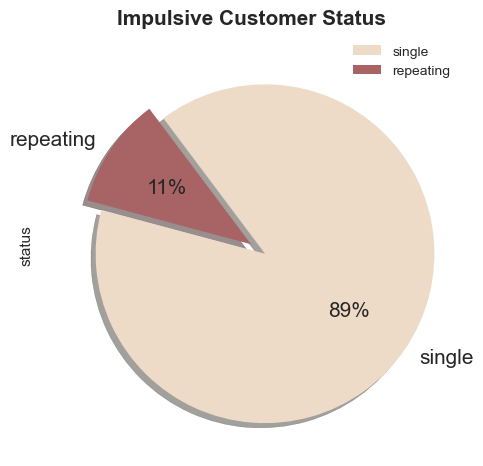

In [38]:
a['status'].value_counts().plot.pie(shadow = True, explode=[0.1, 0],autopct='%.0f%%', 
                                                textprops={'fontsize':15}, startangle=165, 
                                                colors=['#EDDBC7', '#A86464'])

plt.title('Impulsive Customer Status', fontsize=15, fontweight= 'bold')

plt.legend()

### Insight

>- Impulsive Customers are customers who buy goods based on their immediate needs only, but purchase a large quantity of goods.

In [39]:
cluster2= data_cluster[data_cluster['Cluster']== 'Cluster 2']
a= pd.DataFrame(cluster2['ID_cust'].value_counts().reset_index())
status=[]
for i in range(len(a)):
    if a['ID_cust'][i]==1:
        status.append('single')
    else:
        status.append('repeating')
    
a['status']= status
len(a[a['status']=='single'])

694

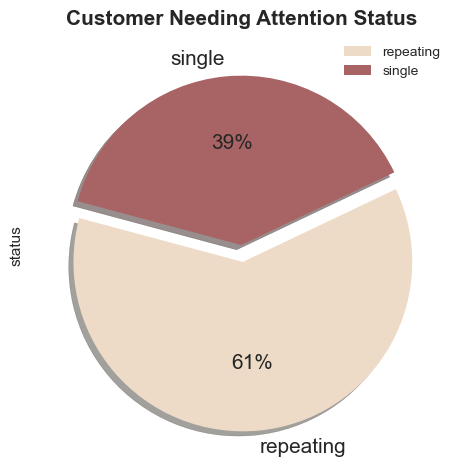

In [40]:
a['status'].value_counts().plot.pie(shadow = True, explode=[0.1, 0],autopct='%.0f%%', 
                                                textprops={'fontsize':15}, startangle=165, 
                                                colors=['#EDDBC7', '#A86464'])

plt.title('Customer Needing Attention Status', fontsize=15, fontweight= 'bold')

plt.legend()

### Insight

- Customer Needing Attention is a customer who does not make repeated transactions regularly

In [41]:
cluster3= data_cluster[data_cluster['Cluster']== 'Cluster 3']
a= pd.DataFrame(cluster3['ID_cust'].value_counts().reset_index())
status=[]
for i in range(len(a)):
    if a['ID_cust'][i]==1:
        status.append('single')
    else:
        status.append('repeating')
    
a['status']= status
len(a[a['status']=='single'])

11

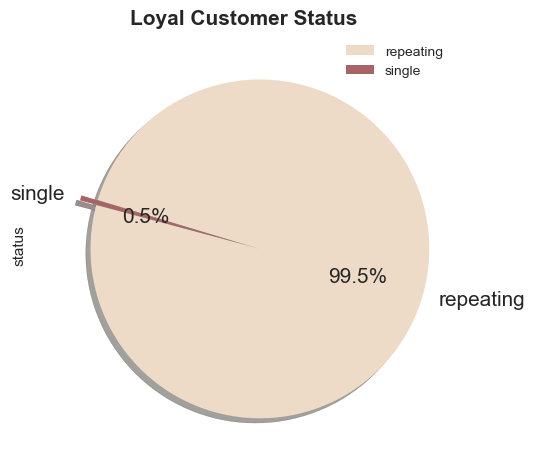

In [42]:
a['status'].value_counts().plot.pie(shadow = True, explode=[0.1, 0],autopct='%.1f%%', 
                                                textprops={'fontsize':15}, startangle=165, 
                                                colors=['#EDDBC7', '#A86464'])

plt.title('Loyal Customer Status', fontsize=15, fontweight= 'bold')


plt.legend()

### Insight

- > Loyal Customers are the type of customers who frequently make transactions more than once.

In [43]:
data_cluster['tipe_customer'] = data_cluster['Cluster'].map({
    'Cluster 1': 'Impulsive Customer',
    'Cluster 2': 'Customer Needing Attention',
    'Cluster 3': 'Loyal Customer'
})
data_cluster.head()

,ID_transaksi,tanggal_transaksi,tahun_transaksi,waktu_transaksi,ID_outlet,ID_cust,ID_produk,order,jumlah,total_pembayaran,harga,promo,jenis_produk,kategori_produk,tipe_produk,ukuran,pajak,jenis_kelamin,tahun_lahir,kota,umur,gen,Cluster,tipe_customer
0,19,2018-12-30,2018,14,3,788,46,1,2,50000.0,25000.0,Tidak,Minuman,Tea,Hot Matcha Latte,Large Size,Ya,Pria,1995,Yogyakarta,23,Gen Z,Cluster 3,Loyal Customer
1,32,2019-03-04,2019,16,3,683,23,1,2,50000.0,25000.0,Tidak,Minuman,Coffee,Americano,Large Size,Ya,Wanita,1999,Yogyakarta,20,Gen Z,Cluster 3,Loyal Customer
2,39,2019-01-24,2019,18,3,664,32,1,1,30000.0,30000.0,Tidak,Minuman,Coffee,Hot Arabica Coffee,Large Size,Ya,Wanita,1996,Yogyakarta,23,Gen Z,Cluster 3,Loyal Customer
3,50,2017-02-04,2017,13,3,316,49,1,2,60000.0,30000.0,Tidak,Minuman,Tea,Hot Black Tea,Large Size,Ya,Wanita,1994,Yogyakarta,23,Gen Z,Cluster 3,Loyal Customer
4,53,2017-04-16,2017,11,3,38,60,1,1,37500.0,37500.0,Tidak,Minuman,Minuman Coklat,Hot chocolate,Medium Size,Ya,Pria,1998,Yogyakarta,19,Gen Z,Cluster 3,Loyal Customer


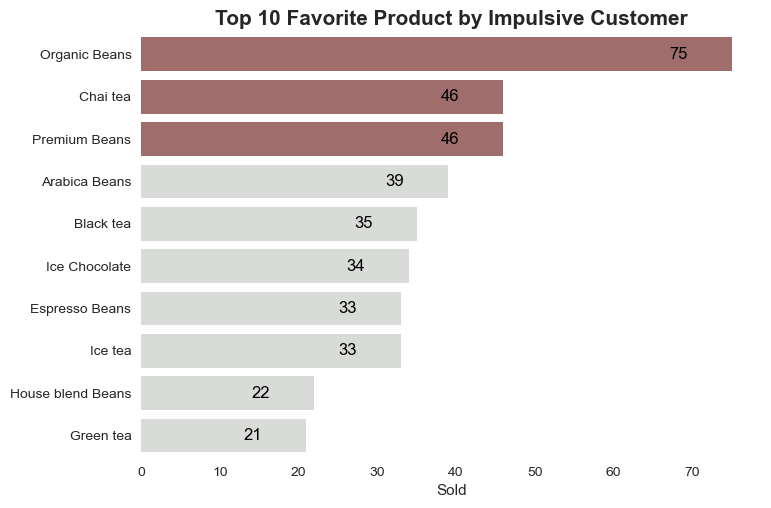

In [44]:
warna = ['#A86464','#A86464','#A86464','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6']
s=cluster1['tipe_produk'].value_counts()

ax = sns.barplot(y=s.index[:10],x= s.values[:10], orient= 'h', palette=warna)
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = -45
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points', 
        va='center',                
        ha=ha,                      
        color = 'black')            

            
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(text=None, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

plt.title('Top 10 Favorite Product by Impulsive Customer', fontweight= 'bold',fontsize= 15)
ax.set_xlabel('Sold')
plt.grid(False)
sns.despine(bottom = True, left = True)
plt.savefig('demo.png', transparent=True);

### Insight

Customers tend to make more transactions for beans products.

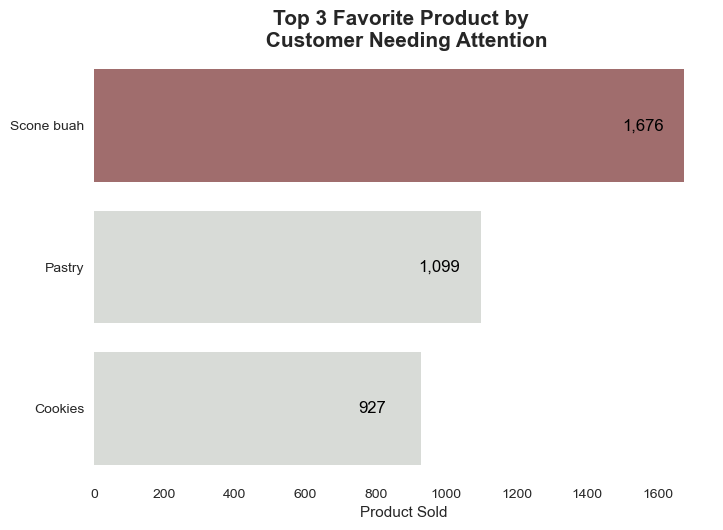

In [45]:
warna = ['#A86464','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6']
s=cluster2['tipe_produk'].value_counts()

ax = sns.barplot(y=s.index[:3],x= s.values[:3], orient= 'h', palette=warna)
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = -45
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points', 
        va='center',                
        ha=ha,                      
        color = 'black')            

            
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(text=None, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

plt.title('Top 3 Favorite Product by \n Customer Needing Attention', fontweight= 'bold',fontsize= 15)
ax.set_xlabel('Product Sold')
plt.grid(False)
sns.despine(bottom = True, left = True)
#plt.savefig('demo.png', transparent=True);

### Insight

The customers have more transactions with food products.

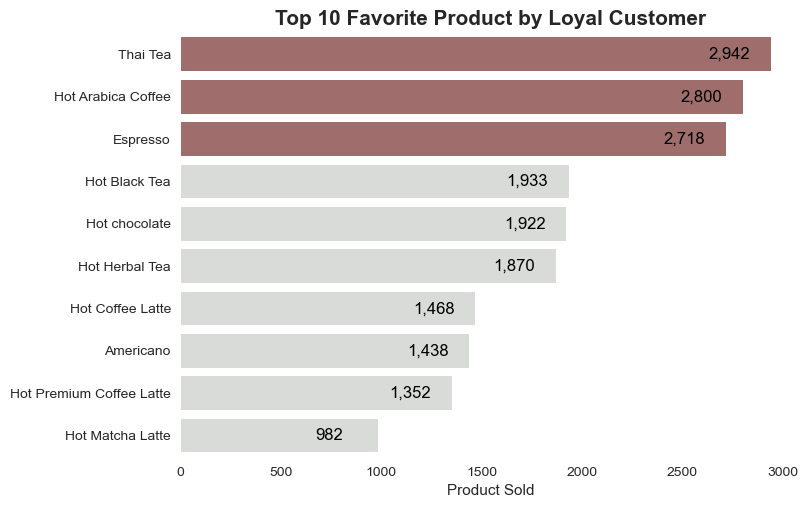

In [46]:
warna = ['#A86464','#A86464','#A86464','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6','#D8DCD6']
s=cluster3['tipe_produk'].value_counts()

ax = sns.barplot(y=s.index[:10],x= s.values[:10], orient= 'h', palette=warna)
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = -45
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'

    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points', 
        va='center',                
        ha=ha,                      
        color = 'black')            

            
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(text=None, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

plt.title('Top 10 Favorite Product by Loyal Customer', fontweight= 'bold',fontsize= 15)
ax.set_xlabel('Product Sold')
plt.grid(False)
sns.despine(bottom = True, left = True)
plt.savefig('demo.png', transparent=True);

## Insight

>- The customers transact more frequently with Coffee and Tea beverages.

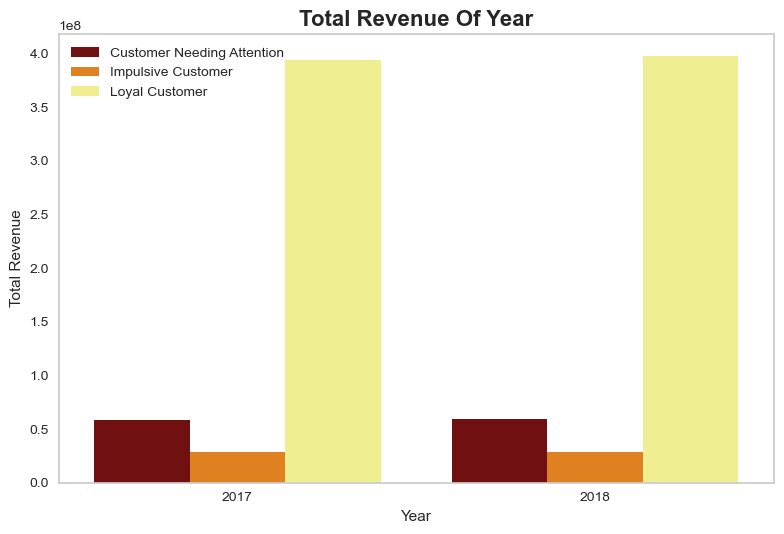

In [47]:
tahun= data_cluster[data_cluster['tahun_transaksi']<=2018]
total= pd.DataFrame(tahun.groupby(['tipe_customer', 'tahun_transaksi'])['total_pembayaran'].sum()).reset_index()
sns.barplot(y= total['total_pembayaran'], x= total['tahun_transaksi'], hue= total['tipe_customer'], palette='afmhot')
plt.legend(loc= 'upper left')
plt.ylabel('Total Revenue')
plt.xlabel('Year')
plt.grid(False)
plt.title('Total Revenue Of Year', fontsize=16, fontweight='bold')
plt.tight_layout()

## Insight

Based on the Total Revenue of the Year, it is found that:

- In 2017 and 2018, Loyal customers had higher total revenue compared to Impulsive Customers and Customers Needing Attention.

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">COMPARE MODEL</div></center>

# GAUSSIAN MIXTURE

In [48]:
from sklearn.mixture import GaussianMixture

In [49]:
gaussian_model = GaussianMixture(n_components=3)

In [50]:
gaussian_model.fit(pca_scores)

GaussianMixture(n_components=3)

In [51]:
gaussian_result = gaussian_model.predict(pca_scores)

In [52]:
df_segm_pca2 = pd.concat([df2.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca2.columns.values[-7:] = ['component 1', 'component 2', 'component 3','component 4','component 5','component 6','component 7']
df_segm_pca2['Cluster Gaussian'] = gaussian_result
df_segm_pca2.head()

,waktu_transaksi,order,jumlah,total_pembayaran,harga,promo,jenis_produk,kategori_produk,tipe_produk,ukuran,pajak,jenis_kelamin,umur,gen,component 1,component 2,component 3,component 4,component 5,component 6,component 7,Cluster Gaussian
0,14,1,2,50000.0,25000.0,1,0,0,12,0,0,0,23,1,-1.525932,0.444165,-0.436419,0.466314,0.376073,0.335832,-0.804957,0
1,16,1,2,50000.0,25000.0,1,0,1,0,0,0,1,20,1,-1.354290,0.597700,0.010452,-0.297014,-1.339315,1.490970,0.822564,0
2,18,1,1,30000.0,30000.0,1,0,1,8,0,0,1,23,1,-0.848124,-0.361029,0.235651,-1.401997,-0.435519,1.360239,0.625612,0
3,13,1,2,60000.0,30000.0,1,0,0,9,0,0,1,23,1,-1.478376,0.800991,0.127527,0.214039,-0.012088,0.667502,1.084033,0
4,11,1,1,37500.0,37500.0,1,0,2,14,1,0,0,19,1,0.227184,-0.292109,-0.741991,-0.409260,0.110811,-0.647091,-0.511517,0


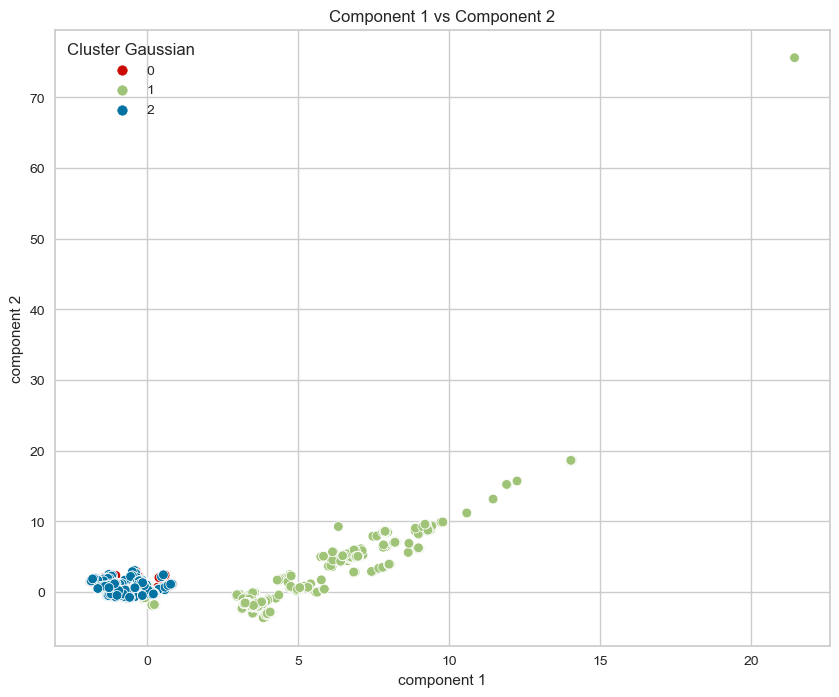

In [53]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca2['component 1'],
    y=df_segm_pca2['component 2'],
    hue=df_segm_pca2['Cluster Gaussian'],
    palette=['r','g','b'])

plt.title('Component 1 vs Component 2')
plt.show()

# BIRCH

In [54]:
from sklearn.cluster import Birch

In [55]:
birch_model = Birch(threshold=0.2, n_clusters=3)

In [56]:
birch_model.fit(pca_scores)

Birch(threshold=0.2)

In [57]:
birch_result = birch_model.predict(pca_scores)

In [58]:
df_segm_pca3 = pd.concat([df2.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca3.columns.values[-7:] = ['component 1', 'component 2', 'component 3','component 4','component 5','component 6','component 7']
df_segm_pca3['Cluster birch'] = birch_result
df_segm_pca3.head()

,waktu_transaksi,order,jumlah,total_pembayaran,harga,promo,jenis_produk,kategori_produk,tipe_produk,ukuran,pajak,jenis_kelamin,umur,gen,component 1,component 2,component 3,component 4,component 5,component 6,component 7,Cluster birch
0,14,1,2,50000.0,25000.0,1,0,0,12,0,0,0,23,1,-1.525932,0.444165,-0.436419,0.466314,0.376073,0.335832,-0.804957,0
1,16,1,2,50000.0,25000.0,1,0,1,0,0,0,1,20,1,-1.354290,0.597700,0.010452,-0.297014,-1.339315,1.490970,0.822564,0
2,18,1,1,30000.0,30000.0,1,0,1,8,0,0,1,23,1,-0.848124,-0.361029,0.235651,-1.401997,-0.435519,1.360239,0.625612,0
3,13,1,2,60000.0,30000.0,1,0,0,9,0,0,1,23,1,-1.478376,0.800991,0.127527,0.214039,-0.012088,0.667502,1.084033,0
4,11,1,1,37500.0,37500.0,1,0,2,14,1,0,0,19,1,0.227184,-0.292109,-0.741991,-0.409260,0.110811,-0.647091,-0.511517,0


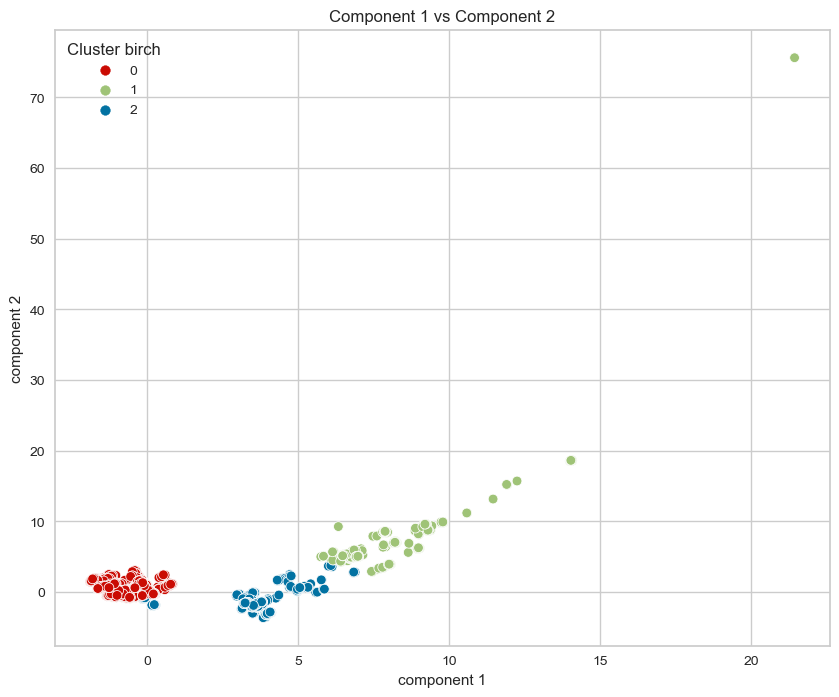

In [59]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca3['component 1'],
    y=df_segm_pca3['component 2'],
    hue=df_segm_pca3['Cluster birch'],
    palette=['r','g','b'])

plt.title('Component 1 vs Component 2')
plt.show()

# AGGLOMERATIVE

In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
Agglo_model = AgglomerativeClustering(n_clusters=3)

In [62]:
Agglo_result = Agglo_model.fit_predict(pca_scores)

In [63]:
df_segm_pca4 = pd.concat([df2.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca4.columns.values[-7:] = ['component 1', 'component 2', 'component 3','component 4','component 5','component 6','component 7']
df_segm_pca4['Cluster Agglo'] = Agglo_result
df_segm_pca4.head()

,waktu_transaksi,order,jumlah,total_pembayaran,harga,promo,jenis_produk,kategori_produk,tipe_produk,ukuran,pajak,jenis_kelamin,umur,gen,component 1,component 2,component 3,component 4,component 5,component 6,component 7,Cluster Agglo
0,14,1,2,50000.0,25000.0,1,0,0,12,0,0,0,23,1,-1.525932,0.444165,-0.436419,0.466314,0.376073,0.335832,-0.804957,0
1,16,1,2,50000.0,25000.0,1,0,1,0,0,0,1,20,1,-1.354290,0.597700,0.010452,-0.297014,-1.339315,1.490970,0.822564,0
2,18,1,1,30000.0,30000.0,1,0,1,8,0,0,1,23,1,-0.848124,-0.361029,0.235651,-1.401997,-0.435519,1.360239,0.625612,0
3,13,1,2,60000.0,30000.0,1,0,0,9,0,0,1,23,1,-1.478376,0.800991,0.127527,0.214039,-0.012088,0.667502,1.084033,0
4,11,1,1,37500.0,37500.0,1,0,2,14,1,0,0,19,1,0.227184,-0.292109,-0.741991,-0.409260,0.110811,-0.647091,-0.511517,0


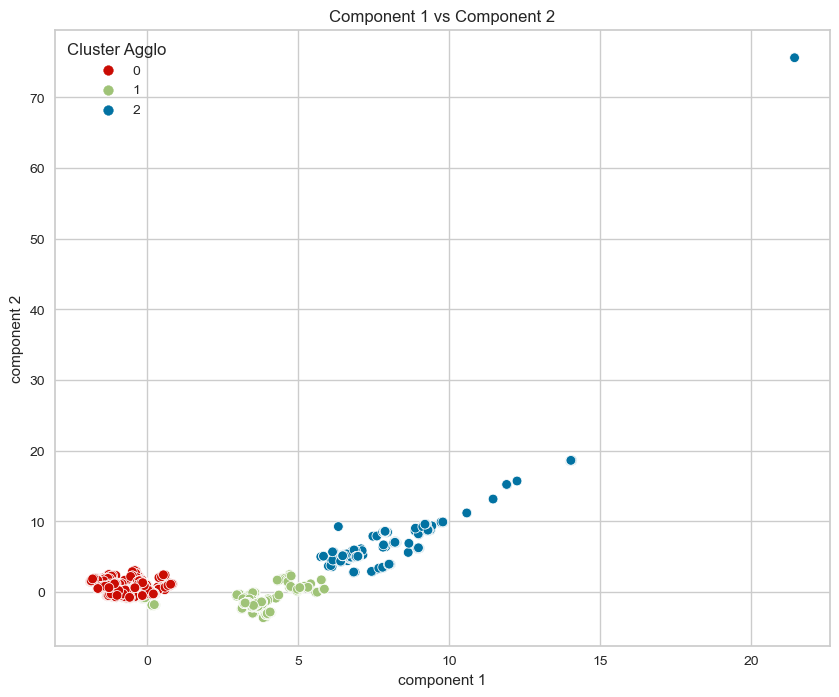

In [64]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca4['component 1'],
    y=df_segm_pca4['component 2'],
    hue=df_segm_pca4['Cluster Agglo'],
    palette=['r','g','b'])

plt.title('Component 1 vs Component 2')
plt.show()

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">EVALUATE MODEL</div></center>

**K-Means Model**

In [65]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pca_scores,kmeans_pca.labels_)

0.825945038269645

**Gaussian Model**

In [66]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pca_scores,gaussian_result)

1.296268225001065

**Birch Model**

In [67]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pca_scores,birch_result)

0.862935333568795

**Aglommerative Model**

In [68]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pca_scores,Agglo_result)

0.8638487539586861

### Comparison of Model Score

In [69]:
from sklearn.metrics import davies_bouldin_score

In [70]:
data = [davies_bouldin_score(pca_scores,kmeans_pca.labels_), davies_bouldin_score(pca_scores,gaussian_result),
        davies_bouldin_score(pca_scores,birch_result), davies_bouldin_score(pca_scores,Agglo_result)]

In [71]:
evaluasi = pd.DataFrame(data, columns=['DBI Score'])
evaluasi.rename(index={0: 'K-Means', 1:'Gaussian', 2:'Birch', 3:'Agglomerative'})

,DBI Score
K-Means,0.825945
Gaussian,1.296268
Birch,0.862935
Agglomerative,0.863849


### Insight

Based on the score results of the model comparison using the Davies Bouldin method, the K-means method has a lower value compared to other models, where the lower the Davies Bouldin score, the better the model can cluster the data.

# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">Market Basket Analysis</div></center>

In [72]:
data=df[['ID_transaksi','tipe_produk']]
data.head()

,ID_transaksi,tipe_produk
0,19,Hot Matcha Latte
1,32,Americano
2,39,Hot Arabica Coffee
3,50,Hot Black Tea
4,53,Hot chocolate


In [73]:
transactions=[]
for item in data['ID_transaksi'].unique():
    lst=list(set(data[data['ID_transaksi']==item]['tipe_produk']))
    transactions.append(lst)

transactions[0:20]

[['Thai Tea',
  'Hot Premium Coffee Latte',
  'Premium Beans',
  'Scone buah',
  'Cookies',
  'Hot Black Tea',
  'Black tea',
  'Hot Herbal Tea',
  'Hot Arabica Coffee',
  'Hot Matcha Latte',
  'Espresso',
  'Hot Coffee Latte',
  'Pastry'],
 ['Thai Tea',
  'Hot Premium Coffee Latte',
  'Scone buah',
  'Cookies',
  'Hot chocolate',
  'Hot Black Tea',
  'Americano',
  'Hot Arabica Coffee',
  'Espresso',
  'Hot Matcha Latte',
  'Hot Coffee Latte'],
 ['Thai Tea',
  'Hot Premium Coffee Latte',
  'Organic Beans',
  'Scone buah',
  'Hot chocolate',
  'Arabica Beans',
  'Hot Black Tea',
  'Americano',
  'Hot Herbal Tea',
  'Hot Arabica Coffee',
  'Espresso',
  'Hot Matcha Latte',
  'Pastry'],
 ['Thai Tea',
  'Hot Premium Coffee Latte',
  'Organic Beans',
  'Scone buah',
  'Hot chocolate',
  'Hot Black Tea',
  'Americano',
  'Hot Herbal Tea',
  'Hot Arabica Coffee',
  'Espresso',
  'Hot Coffee Latte'],
 ['Thai Tea',
  'Scone buah',
  'Hot chocolate',
  'Hot Black Tea',
  'Americano',
  'Hot Her

In [74]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import OneHotEncoder

In [75]:
te = TransactionEncoder()
encodedData = te.fit(transactions).transform(transactions)
data = pd.DataFrame(encodedData, columns=te.columns_)
data.head()

,Americano,Arabica Beans,Black tea,Chai tea,Cookies,Espresso,Espresso Beans,Green tea,Hot Arabica Coffee,Hot Black Tea,Hot Coffee Latte,Hot Herbal Tea,Hot Matcha Latte,Hot Premium Coffee Latte,Hot chocolate,House blend Beans,Ice Chocolate,Ice tea,Organic Beans,Pastry,Premium Beans,Scone buah,Thai Tea
0,False,False,True,False,True,True,False,False,True,True,True,True,True,True,False,False,False,False,False,True,True,True,True
1,True,False,False,False,True,True,False,False,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True
2,True,True,False,False,False,True,False,False,True,True,False,True,True,True,True,False,False,False,True,True,False,True,True
3,True,False,False,False,False,True,False,False,True,True,True,True,False,True,True,False,False,False,True,False,False,True,True
4,True,False,False,False,False,True,False,False,True,True,True,True,False,False,True,False,False,False,False,True,False,True,True


**Minimal Support : 10%**

In [76]:
frequentItems= apriori(data, use_colnames=True, min_support=0.1)
frequentItems.head()

,support,itemsets
0,0.313786,(Americano)
1,0.223826,(Cookies)
2,0.488793,(Espresso)
3,0.502303,(Hot Arabica Coffee)
4,0.386245,(Hot Black Tea)


**Threshold = 1**

In [77]:
rules = association_rules(frequentItems, metric="confidence", min_threshold=0.5)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,Cookies,Americano,0.223826,0.313786,0.113601,0.507545,1.617488,0.043368,1.393455,0.491845
1,Americano,Espresso,0.313786,0.488793,0.186982,0.595890,1.219105,0.033606,1.265020,0.261910
2,Americano,Hot Arabica Coffee,0.313786,0.502303,0.195272,0.622309,1.238913,0.037656,1.317737,0.281021
3,Americano,Hot Black Tea,0.313786,0.386245,0.159656,0.508806,1.317315,0.038458,1.249517,0.351027
4,Americano,Hot chocolate,0.313786,0.389929,0.160577,0.511742,1.312396,0.038223,1.249483,0.346881


In [78]:
sort= rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False)

In [79]:
scone= sort[sort['antecedents']== 'Scone buah'].head(3)
pastry= sort[sort['antecedents']== 'Pastry'].head(3)
cookies= sort[sort['antecedents']== 'Cookies'].head(3)

In [80]:
scone

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
22,Scone buah,Espresso,0.335278,0.488793,0.232115,0.692308,1.416361,0.068234,1.661422,0.442238
32,Scone buah,Hot Arabica Coffee,0.335278,0.502303,0.228738,0.682234,1.358214,0.060327,1.566240,0.396766
60,Scone buah,Thai Tea,0.335278,0.508443,0.224133,0.668498,1.314794,0.053663,1.482817,0.360187


In [81]:
pastry

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,Pastry,Hot Arabica Coffee,0.236107,0.502303,0.164262,0.695709,1.385039,0.045664,1.635595,0.363923
21,Pastry,Espresso,0.236107,0.488793,0.163955,0.694408,1.420658,0.048547,1.672842,0.387621
59,Pastry,Thai Tea,0.236107,0.508443,0.159042,0.673602,1.324832,0.038995,1.506004,0.320971


In [82]:
cookies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,Cookies,Thai Tea,0.223826,0.508443,0.160577,0.717421,1.411015,0.046775,1.739538,0.375290
7,Cookies,Hot Arabica Coffee,0.223826,0.502303,0.158428,0.707819,1.409148,0.046000,1.703386,0.374080
6,Cookies,Espresso,0.223826,0.488793,0.155358,0.694102,1.420031,0.045953,1.671164,0.381087


# <center><div style="font-family: Trebuchet MS; background-color: #57C5B6; color: #2D2926; padding: 12px; line-height: 1;">CONCLUSION</div></center>

**Conclusion**

>- Based on the clustering results, 3 customer groups were obtained, namely: Impulsive Customer, Customer Need Attention, and Loyal Customer. Customer Need Attention has the largest number of customers with a single order and they tend to purchase more food products.

**Suggestion**:

>- This poses a challenge for the marketing team to encourage this group to repeat their orders more frequently, in order to increase product sales in 2023.

**Recommendation**

>- The Coffee Shop could try to offer products with a product combination package system to “Customer need attention” group where each purchase of food is combined with one of a beverage products in one purchase.